In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df[['Name', 'Sex', 'Ticket']].describe()

,Name,Sex,Ticket
count,891,891,891
unique,891,2,681
top,"Braund, Mr. Owen Harris",male,347082
freq,1,577,7


<AxesSubplot:>

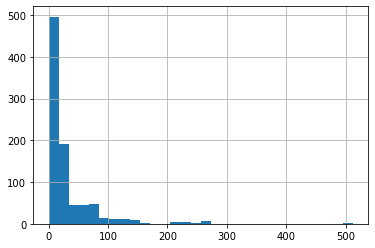

In [6]:
df.Fare.hist(bins = 30)

<AxesSubplot:>

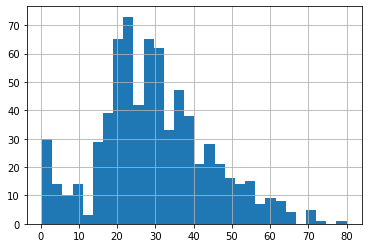

In [7]:
df.Age.hist(bins = 30)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [10]:
df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [11]:
df_2 = df.drop(['Ticket', 'PassengerId', 'Cabin', 'Name'], axis = 1)
test_df_2 = test_df.drop(['Ticket', 'PassengerId', 'Cabin', 'Name'], axis = 1)

In [12]:
df_2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
df_2.groupby(['Sex', 'Survived']).agg({'Survived': 'count'})

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [14]:
df_2.groupby(['Pclass', 'Survived']).agg({'Survived': 'count'})

Survived
Pclass Survived          
1      0               80
       1              136
2      0               97
       1               87
3      0              372
       1              119

In [15]:
df_2.groupby(['Pclass', 'Sex', 'Survived']).agg({'Survived': 'count'})

Survived
Pclass Sex    Survived          
1      female 0                3
              1               91
       male   0               77
              1               45
2      female 0                6
              1               70
       male   0               91
              1               17
3      female 0               72
              1               72
       male   0              300
              1               47

In [16]:
df_2.info()
#Missing value issue => age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
df_3 = df_2.copy()
df_test_3 = test_df_2.copy()
df_test_3['Age'] = test_df_2['Age'].fillna(df_3['Age'].median())
df_3['Age'] = df_3['Age'].fillna(df_3['Age'].median())

In [18]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [19]:
df_3[df_3.Embarked.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [20]:
df_3.groupby(['Sex', 'Pclass', 'Embarked']).count()

Survived  Age  SibSp  Parch  Fare
Sex    Pclass Embarked                                   
female 1      C               43   43     43     43    43
              Q                1    1      1      1     1
              S               48   48     48     48    48
       2      C                7    7      7      7     7
              Q                2    2      2      2     2
              S               67   67     67     67    67
       3      C               23   23     23     23    23
              Q               33   33     33     33    33
              S               88   88     88     88    88
male   1      C               42   42     42     42    42
              Q                1    1      1      1     1
              S               79   79     79     79    79
       2      C               10   10     10     10    10
              Q                1    1      1      1     1
              S               97   97     97     97    97
       3      C               43   43     43     43    43
              Q               39   39     39     39    39
              S              265  265    265    265   265

In [21]:
df_3.groupby(['Sex', 'Embarked']).count()

Survived  Pclass  Age  SibSp  Parch  Fare
Sex    Embarked                                           
female C               73      73   73     73     73    73
       Q               36      36   36     36     36    36
       S              203     203  203    203    203   203
male   C               95      95   95     95     95    95
       Q               41      41   41     41     41    41
       S              441     441  441    441    441   441

In [22]:
df_3['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
df_3['Embarked'] = df_3['Embarked'].fillna('S')
df_test_3['Embarked'] = df_test_3['Embarked'].fillna('S')

In [24]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [25]:
df_4 = df_3.copy()
df_test_4 = df_test_3.copy()

In [26]:
df_4.Sex.unique()
#computer only understand numbers. Sex => binary

array(['male', 'female'], dtype=object)

In [27]:
df_4['Sex'] = df_4['Sex'].map({'female' : 1, 'male' : 0})
df_test_4['Sex'] = df_test_4['Sex'].map({'female' : 1, 'male' : 0})

In [28]:
df_4['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [29]:
df_test_4['Embarked'] = df_test_4['Embarked'].map({'C' : 1, 'S' : 0, 'Q' : 2})
df_4['Embarked'] = df_4['Embarked'].map({'C' : 1, 'S' : 0, 'Q' : 2})

In [30]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [31]:
df_4.Survived.unique()

array([0, 1])

In [32]:
#Refer to Slides on Linear vs Logistic Regression
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(max_iter = 1000)
X = df_4.drop('Survived', axis = 1)
y = df_4['Survived']
cls.fit(X, y)

LogisticRegression(max_iter=1000)

In [33]:
y_pred = cls.predict(X)

In [34]:
sum(y_pred == y) / y.shape[0]

0.8013468013468014

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.8013468013468014

In [36]:
df_4

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,28.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [37]:
df_4.iloc[:int(0.8 * df_4.shape[0]), :]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
707,1,1,0,42.0,0,0,26.2875,0
708,1,1,1,22.0,0,0,151.5500,0
709,1,3,0,28.0,1,1,15.2458,1
710,1,1,1,24.0,0,0,49.5042,1


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [40]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(max_iter = 1000, random_state=44)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
cls.fit(X_train, y_train)

#Training Error
y_pred = cls.predict(X_train)
print(accuracy_score(y_train, y_pred))

#Validation(testing) Error

y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8089887640449438
0.7318435754189944


In [41]:
df_test_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [42]:
df_test_4.Fare = df_test_4.Fare.fillna(df_test_4.Fare.median())

In [43]:
y_pred = cls.predict(df_test_4)

In [44]:
pd.DataFrame({'PassengerId' : test_df.PassengerId, 'Survived' : y_pred}).to_csv('submit1.csv', index = None)

In [45]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(random_state=44)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred = cls.predict(df_test_4)
pd.DataFrame({'PassengerId' : test_df.PassengerId, 'Survived' : y_pred}).to_csv('submit2.csv', index = None)

0.9845505617977528
0.7150837988826816


In [46]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(random_state=44, n_estimators= 400)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred = cls.predict(df_test_4)
pd.DataFrame({'PassengerId' : test_df.PassengerId, 'Survived' : y_pred}).to_csv('submit2.csv', index = None)

0.9845505617977528
0.7039106145251397


In [47]:
X = df_4.drop('Survived', axis = 1)
y = df_4['Survived']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
new_X = scaler.transform(X)
new_test_X = scaler.transform(df_test_4)
pd.DataFrame(new_test_X).describe()

,0,1,2,3,4,5,6
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,-0.051570,0.023493,0.034078,-0.068631,0.013345,0.067901,0.161688
std,1.007462,1.008165,0.973531,0.813665,1.218251,1.124524,1.079015
min,-1.566107,-0.737695,-2.243369,-0.474545,-0.473674,-0.648422,-0.568837
25%,-1.566107,-0.737695,-0.488887,-0.474545,-0.473674,-0.489442,-0.568837
50%,0.827377,-0.737695,-0.104637,-0.474545,-0.473674,-0.357391,-0.568837
75%,0.827377,1.355574,0.490949,0.432793,-0.473674,-0.014745,1.005181
max,0.827377,1.355574,3.584155,6.784163,10.698058,9.667167,2.579199


In [48]:
X = df_4.drop('Survived', axis = 1)
y = df_4['Survived']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
new_X = scaler.transform(X)
new_test_X = scaler.transform(df_test_4)
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(max_iter = 1000, random_state=44)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=44)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred = cls.predict(new_test_X)
pd.DataFrame({'PassengerId' : test_df.PassengerId, 'Survived' : y_pred}).to_csv('submit3.csv', index = None)

0.8089887640449438
0.7318435754189944


In [49]:
X = df_4.drop('Survived', axis = 1)
y = df_4['Survived']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
new_X = scaler.transform(X)
new_test_X = scaler.transform(df_test_4)
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(random_state=44)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=44)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred = cls.predict(new_test_X)
pd.DataFrame({'PassengerId' : test_df.PassengerId, 'Survived' : y_pred}).to_csv('submit4.csv', index = None)

0.9845505617977528
0.7150837988826816


In [50]:
df_4.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


In [51]:
df_5 = df_4.drop('Fare', axis = 1)
df_test_5 = df_test_4.drop('Fare', axis = 1)

In [52]:
df_4.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [53]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [54]:
def func(x):
    if x <= 10:
        return 5
    elif x < 20:
        return 15
    elif x < 30:
        return 25
    elif x < 50:
        return 40
    else:
        return 65
df_5['Age'] = df_5.Age.apply(func)
df_test_5['Age'] = df_test_5.Age.apply(func)

In [55]:
X = df_5.drop('Survived', axis = 1)
y = df_5['Survived']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
new_X = scaler.transform(X)
new_test_X = scaler.transform(df_test_5)
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(random_state=44)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=44)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred = cls.predict(new_test_X)
pd.DataFrame({'PassengerId' : test_df.PassengerId, 'Survived' : y_pred}).to_csv('submit5.csv', index = None)

0.8862359550561798
0.7486033519553073


In [56]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [57]:
cls.feature_importances_

array([0.17933348, 0.42284236, 0.14706872, 0.10570161, 0.07967952,
       0.06537431])

In [58]:
df_6 = df_5[['Survived', 'Pclass', 'Sex', 'Age']]
df_test_6 = df_test_5[['Pclass', 'Sex', 'Age']]

In [59]:
X = df_6.drop('Survived', axis = 1)
y = df_6['Survived']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
new_X = scaler.transform(X)
new_test_X = scaler.transform(df_test_6)
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(random_state=44)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=44)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred = cls.predict(new_test_X)
pd.DataFrame({'PassengerId' : test_df.PassengerId, 'Survived' : y_pred}).to_csv('submit6.csv', index = None)
#STOP!

0.8258426966292135
0.7541899441340782
